In [2]:
# Imports and Requirements
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
from scipy import signal
from tqdm import tqdm
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import time
from matplotlib import style

# Enabling Cuba
if torch.cuda.is_available():
  device = torch.device("cuda:0")
  print("Running on GPU -", device )
else:
  device = torch.device("cpu")
  print("Running on CPU -", device )

Running on CPU - cpu


In [0]:
def graph_data(MODEL_NAME, EPOCHS):
  style.use("ggplot")
  PATH = "/content/drive/My Drive/ECG_MODELS/"

  contents = open(PATH+"data/"+f"{MODEL_NAME}.log", "r").read().split("\n")
  times = []
  accuracies = []
  losses = []
  mean_loss = []
  mean_acc = []
  val_accs = []
  val_losses = []
  
  contents = (c.split(",") for c in contents[:-1])
  for temp in list(contents):

    times.append(float(temp[0]))
    accuracies.append(float(temp[1]))
    losses.append(float(temp[2]))
    
    val_accs.append(float(temp[3]))
    val_losses.append(float(temp[4]))


  print("Best Valid Accuracy:", max(val_accs))
  times = (np.asarray(times) - min(times))
  times = times/np.amax(times)
  times = times * EPOCHS
  fig = plt.figure(figsize=(20, 10))
  ax1 = plt.subplot2grid((2,1), (0,0))
  ax2 = plt.subplot2grid((2,1), (1,0), sharex=ax1)

  ax1.set_ylim([0,1])
  ax1.set_ylabel('Accuracy (0.0-1.0)')
  ax1.plot(times, accuracies, label="Training Set Accuracy")
  ax1.plot(times, val_accs, label="Validation Set Accuracy")
  #ax1.plot(times, abs(np.array(val_accs)-np.array(accuracies)), label="Δ Accuracy (between Training & Validation Set)")
  ax1.legend(loc=2)

  ax2.set_ylim([0,2])
  ax2.set_ylabel('Loss (0.0-2.0)')
  ax2.set_xlabel(f'Epochs (0-{EPOCHS})')
  ax2.plot(times, losses, label="Training Set Loss")
  ax2.plot(times, val_losses, label="Validation Set Loss")
  #ax2.plot(times, abs(np.array(val_losses)-np.array(losses)), label="Δ Loss (between Training & Validation Set)")
  ax2.legend(loc=2)
  #plt.savefig(PATH+"graphs/"+MODEL_NAME+"v2")
  #plt.show()
  return times, accuracies, val_accs, losses, val_losses

Best Valid Accuracy: 0.99


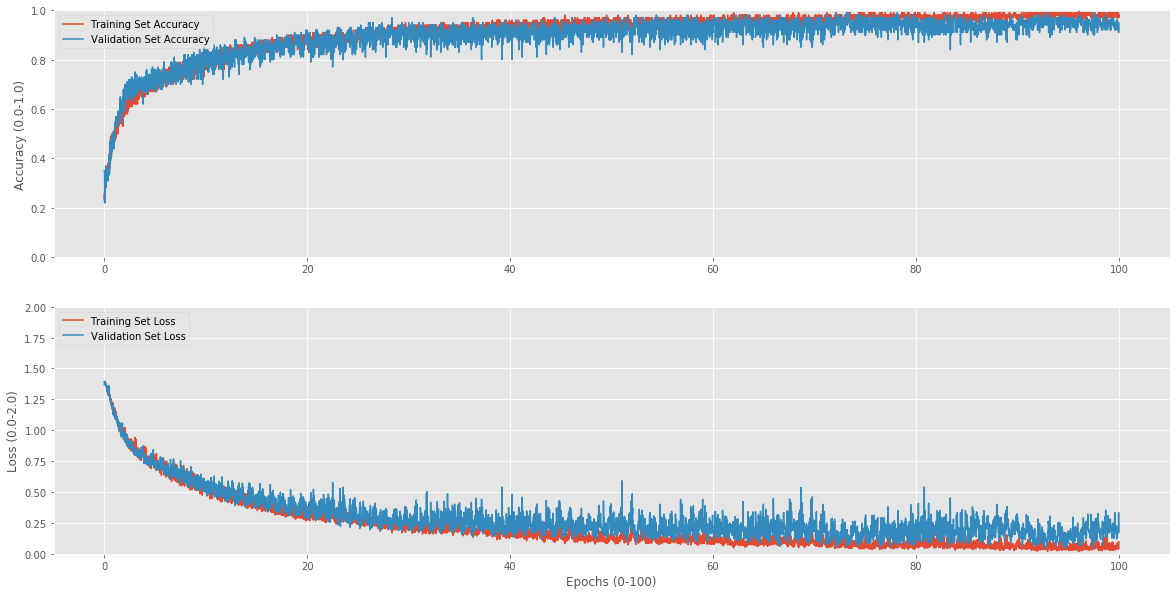

In [4]:
#name = "layers-7_parms-180_180_150_120_90_45_64_4_model-1581479325"
name = "layers-7_parms-180_180_150_120_90_45_64_4_model-1581278467"
times, accuracies, val_accs, losses, val_losses = graph_data(name, 100)

In [0]:
import csv
from sklearn.linear_model import LogisticRegression

a = [round(f,1) for f in times]

d_loss = []
d_acc = []

for x in range(len(times)):
  d_acc.append(abs(accuracies[x]-val_accs[x]))
  d_loss.append(abs(losses[x]-val_losses[x]))

count = 1
with open('/content/drive/My Drive/ECG_MODELS/csv_data/'+name+".csv", 'w', newline='') as file:
  writer = csv.writer(file)
  writer.writerow(["Epochs", "Training Set Accuracy", "Validation Set Accuracy", "Training Set Loss", "Validation Set Loss"])
  writer.writerow([round(times[0])+1, accuracies[0], val_accs[0], losses[0], val_losses[0]])
  for i in range(5, 105, 5):
    try:
      x = a.index(i)
    except:
      x = a.index(i-.1)
    writer.writerow([round(times[x]), accuracies[x], val_accs[x], losses[x], val_losses[x]])
  writer.writerow(["ΔTraining & Validation Set", round(np.mean(d_acc),5), round(np.mean(d_acc),5), round(np.mean(d_loss),5), round(np.mean(d_loss),5)])
  writer.writerow(["Standard Deviation", round(np.std(accuracies),5), round(np.std(val_accs),5), round(np.std(losses),5), round(np.std(val_losses),5)])
  writer.writerow(["Max Value", round(np.amax(accuracies),5), round(np.amax(val_accs),5), round(np.amax(losses),5), round(np.amax(val_losses),5)])

